In [ ]:
# importing the libraries
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split


In [ ]:
link = "/content/sample_data/nyc-flights.csv"
df = pd.read_csv(link)
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2


In [ ]:
df['delay_bool'] = df['dep_delay'].apply(lambda item: 1 if int(item) >0 else 0)
df.head()
cond4 = df['delay_bool']==1
print("average departure delay in minutes at airport", df.loc[cond4]['dep_delay'].mean())

average departure delay in minutes at airport 39.50488319399953


In [ ]:
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,delay_bool
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40,1
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57,0
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59,0
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41,0
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2,0


In [ ]:
chart1 = df.pivot_table(index='month', values='dep_delay',aggfunc='mean')
chart1.reset_index(inplace=True)
chart1.head()
chart2 = df.pivot_table(index='month', values='dep_delay',columns='carrier',aggfunc='mean')
chart2.head()
chart3 = df.pivot_table(index='month', values='dep_delay',columns='origin',aggfunc='mean')
chart3.reset_index(inplace=True)
chart3.head()
chart4 = df.groupby('origin')['dep_delay'].mean().reset_index()
chart4.head()
chart5 = df.groupby('carrier')['dep_delay'].mean().reset_index()
chart5.sort_values('dep_delay',inplace=True,ascending=False)
chart5.head()

,carrier,dep_delay
8,HA,38.529412
10,OO,22.000000
5,EV,20.066122
7,FL,18.368078
15,YV,18.264151


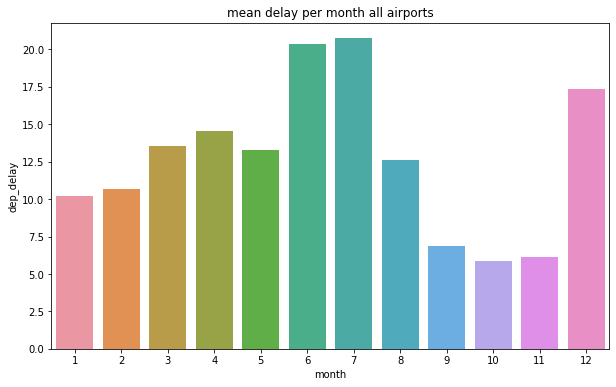

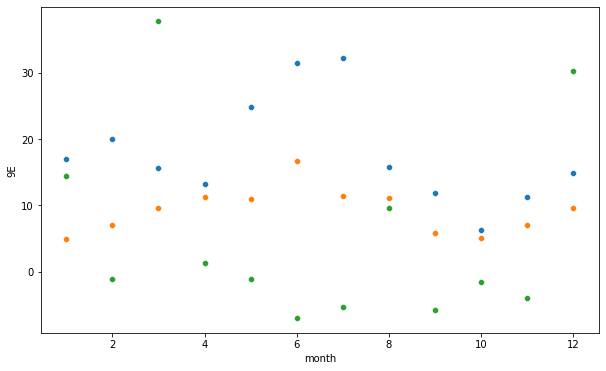

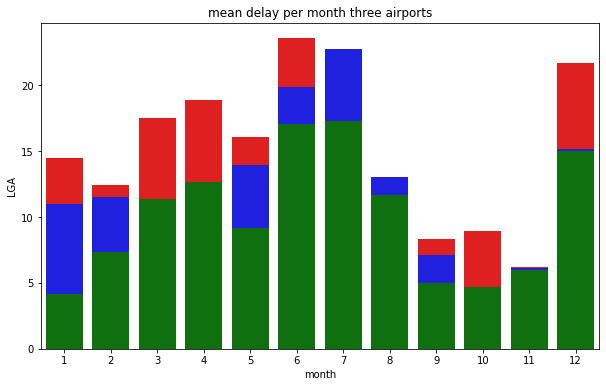

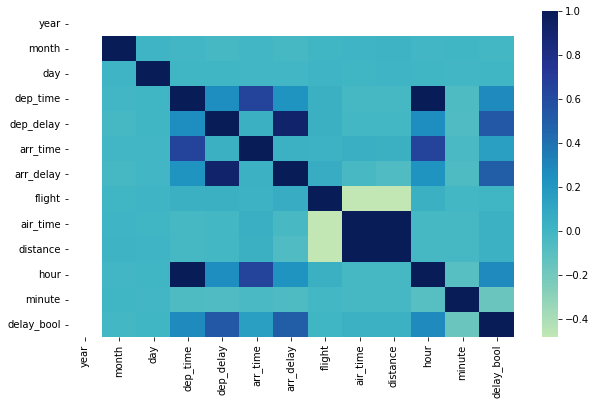

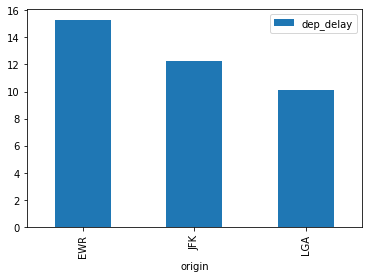

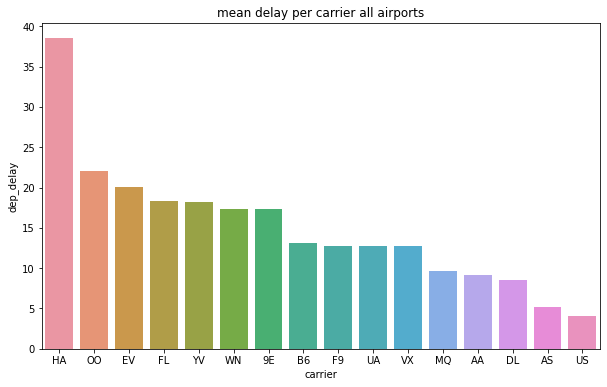

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=chart1,x='month', y='dep_delay')
plt.title("mean delay per month all airports")
plt.show()
plt.figure(figsize=(10,6))
sns.scatterplot(data=chart2,x='month',y='9E')
sns.scatterplot(data=chart2,x='month',y='AA')
sns.scatterplot(data=chart2,x='month',y='AS')
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(data=chart3,x='month', y=chart3['EWR'],color='red')
sns.barplot(data=chart3,x='month', y=chart3['JFK'],color='blue')
sns.barplot(data=chart3,x='month', y=chart3['LGA'],color='green')
plt.title("mean delay per month three airports")
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap="YlGnBu", center=0)
plt.show()
chart4.plot(x='origin',y='dep_delay',kind='bar')
plt.show()
plt.figure(figsize=(10,6))
sns.barplot(data=chart5,x='carrier', y='dep_delay')
plt.title("mean delay per carrier all airports")
plt.show()

In [ ]:
df_EWR = df[df['origin'] == 'EWR'].copy()
#df_EWR['morning'] = df_EWR
df_EWR['dest_n'] = df_EWR['dest'].factorize()[0]
df_EWR['delay_bool'] = df_EWR['dep_delay'].apply(lambda item: 1 if int(item) >0 else 0)
df_EWR.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,delay_bool,dest_n
6,2013,12,9,1259,14,1617,22,WN,N218WN,1428,EWR,HOU,240,1411,12,59,1,0
9,2013,4,30,1323,62,1549,60,EV,N12163,4162,EWR,JAX,110,820,13,23,1,1
12,2013,4,26,809,-2,1030,22,EV,N16559,5790,EWR,DAY,87,533,8,9,0,2
15,2013,1,23,2024,37,2141,29,EV,N17115,4412,EWR,BUF,53,282,20,24,1,3
16,2013,2,8,644,-1,817,20,EV,N14916,4241,EWR,DCA,45,199,6,44,0,4


In [ ]:
##### EWR airport
df_EWR['dest'].value_counts()
#df_EWR['dest']
# number of dep flights at EWR airport
print("number of dep flights at EWR airport", df[df['origin'] == 'EWR'].value_counts().sum())
# number of carrier at EWR aiport
print("number of carrier at EWR aiport", df_EWR['carrier'].nunique())
# Number of flights by carrier at EWR airport
print("Number of flights by carrier at EWR airport\n",df_EWR['carrier'].value_counts())
# average departure delay in minutes at EWR airport
cond = df_EWR['delay_bool']==1
print("average departure delay in minutes at EWR airport", df_EWR.loc[cond]['dep_delay'].mean())
#average departure delay in minutes at EWR airport per carrier
print("average departure delay in minutes at EWR airport per carrier\n",df_EWR.loc[cond].groupby("carrier")['dep_delay'].mean())


number of dep flights at EWR airport 11771
number of carrier at EWR aiport 12
Number of flights by carrier at EWR airport
 UA    4559
EV    4170
WN     631
B6     625
DL     445
US     444
AA     350
MQ     210
VX     149
9E     121
AS      66
OO       1
Name: carrier, dtype: int64
average departure delay in minutes at EWR airport 39.09809828657503
average departure delay in minutes at EWR airport per carrier
 carrier
9E    43.500000
AA    46.576087
AS    39.705882
B6    46.659292
DL    49.582781
EV    49.826520
MQ    55.782051
UA    28.619785
US    34.822917
VX    39.173077
WN    35.841176
Name: dep_delay, dtype: float64


In [ ]:
##### LGA airport

df_LGA = df[df['origin'] == 'LGA'].copy()

df_LGA['delay_bool'] = df_LGA['dep_delay'].apply(lambda item: 1 if int(item) >0 else 0)
df_LGA.head()

df_LGA['dest'].value_counts()
#df_EWR['dest']
# number of dep flights at LGA airport
print("number of dep flights at LGA airport" ,df[df['origin'] == 'LGA'].value_counts().sum())
# number of carrier at LGA aiport
print("number of carrier at LGA aiport",df_LGA['carrier'].nunique())
# Number of flights by carrier at LGA airport
print("Number of flights by carrier at LGA airport\n", df_LGA['carrier'].value_counts())
# average departure delay in minutes at LGA airport
cond = df_LGA['delay_bool']==1
print("average departure delay in minutes at LGA airport", df_LGA.loc[cond]['dep_delay'].mean())
#average departure delay in minutes at LGA airport per carrier
print("average departure delay in minutes at LGA airport per carrier\n", df_LGA.loc[cond].groupby("carrier")['dep_delay'].mean())


number of dep flights at LGA airport 10067
number of carrier at LGA aiport 13
Number of flights by carrier at LGA airport
 DL    2236
MQ    1580
AA    1450
US    1269
EV     854
UA     771
WN     630
B6     585
FL     307
9E     261
F9      69
YV      53
OO       2
Name: carrier, dtype: int64
average departure delay in minutes at LGA airport 41.121921921921924
average departure delay in minutes at LGA airport per carrier
 carrier
9E    41.211111
AA    37.516055
B6    45.581081
DL    38.061840
EV    59.960245
F9    29.828571
FL    39.462963
MQ    41.443966
OO    85.000000
UA    41.062500
US    36.934932
WN    34.449848
YV    57.714286
Name: dep_delay, dtype: float64


In [ ]:
print("Number of flights by carrier at LGA airport\n", df_LGA['carrier'].value_counts())

Number of flights by carrier at LGA airport
 DL    2236
MQ    1580
AA    1450
US    1269
EV     854
UA     771
WN     630
B6     585
FL     307
9E     261
F9      69
YV      53
OO       2
Name: carrier, dtype: int64


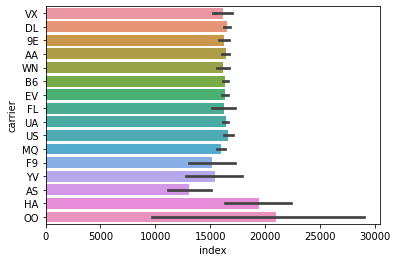

In [ ]:
#plt.figure(figsize=(10,5))
#sns.histplot(data=df_EWR,x='dest_n')
#sns.scatterplot(data=big_data_frame,x=big_data_frame['DATE'].dt.year, y=big_data_frame['MAX_TEMPERATURE_C'].median(),color='red')
plt.show()
df1= df_LGA['carrier'].value_counts()
df1=df.reset_index()
sns.barplot(data=df1,x='index',y='carrier')

In [ ]:
df.head()
df_LGA.loc[cond]['dep_delay'].mean()

41.121921921921924